# Final Project Step 3 Dendograms

```
Course:   DS 5001 
Module:   Final
Date:     8 May 2022
Author:   Thomas McIntyre gem5cm@virginia.edu
Purpose:  This notebook will utlize the data created in step 2 to begin creatin and visualizing dendo grams.
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from numpy.linalg import norm
sns.set()
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [2]:
data_home = "data"
local_lib = "code"
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
SENTS = OHCO[:4]
PARAS = OHCO[:3]
CHAPS = OHCO[:2]
BOOKS = OHCO[:1]

### Dendograms

In [3]:
LIB = pd.read_csv(f"{data_home}/LIB.csv").set_index(OHCO[:1])
CORPUS = pd.read_csv(f"{data_home}/CORPUS.csv").set_index(OHCO)
VOCAB = pd.read_csv(f"{data_home}/VOCAB.csv").set_index("term_str")
BOW = pd.read_csv(f"{data_home}/BOW.csv").rename(columns = {"Unnamed: 2": "term_str"}).set_index(["book_id", "chap_num", "term_str"])
TFIDF = pd.read_csv(f"{data_home}/TFIDF.csv").set_index(CHAPS)
DOC = pd.read_csv(f"{data_home}/DOC.csv").set_index(CHAPS)

In [4]:
top2000 = VOCAB.loc[VOCAB["max_pos"].isin(["NN","NNS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ", "JJ", "JJR", "JJS", "RB", "RBR", "RBS"])].sort_values("dfidf", ascending = False).head(2000)
top2000

,n,tfidf_mean,df,dfidf,p,i,max_pos,n_pos,stop
term_str,,,,,,,,,
easy,264,0.003811,196,282.883248,0.000305,11.676997,JJ,10.0,0
present,359,0.005527,197,282.880161,0.000415,11.233551,JJ,9.0,0
fool,388,0.005420,195,282.878975,0.000449,11.121478,NN,10.0,0
big,489,0.006594,195,282.878975,0.000566,10.787701,JJ,6.0,0
loved,381,0.005573,195,282.878975,0.000441,11.147744,VBD,9.0,0
...,...,...,...,...,...,...,...,...,...
footsteps,72,0.001811,53,176.493777,0.000083,13.551466,NNS,5.0,0
wretch,80,0.001917,53,176.493777,0.000093,13.399463,NN,7.0,0
yielded,67,0.001791,53,176.493777,0.000078,13.655302,VBN,7.0,0


In [5]:
TFIDF = TFIDF[top2000.index]
TFIDF = TFIDF.groupby(["book_id"]).mean()
TFIDF

,easy,present,fool,big,loved,darkness,steps,shut,age,living,...,intended,roaring,men,light,gentlemen,footsteps,wretch,yielded,bench,mocking
book_id,,,,,,,,,,,,,,,,,,,,,
1,0.004083,0.001266,0.007018,0.007183,0.006815,0.007443,0.008497,0.002683,0.006253,0.002467,...,0.000909,0.002773,0.042115,0.009166,0.000000,0.002639,0.000135,0.001089,0.005747,0.002437
2,0.004564,0.001065,0.012901,0.011203,0.006092,0.005780,0.009275,0.003651,0.003900,0.004206,...,0.000929,0.001162,0.053780,0.009166,0.000000,0.002360,0.000759,0.003781,0.001488,0.001817
3,0.003920,0.001722,0.009380,0.016399,0.004820,0.005722,0.008983,0.002936,0.002885,0.003073,...,0.000830,0.001455,0.037144,0.008730,0.000000,0.001688,0.000495,0.000824,0.002762,0.002068
4,0.003743,0.006236,0.002390,0.006358,0.001431,0.014794,0.003828,0.007132,0.002822,0.006903,...,0.001985,0.002835,0.013767,0.035601,0.000000,0.002190,0.000372,0.000525,0.000481,0.000364
16,0.003126,0.004115,0.000000,0.007385,0.008047,0.004034,0.000000,0.008710,0.001726,0.002511,...,0.000000,0.000000,0.003525,0.014583,0.004532,0.000000,0.000000,0.000666,0.000000,0.003469
730,0.002316,0.003051,0.001227,0.001212,0.001822,0.003502,0.003346,0.005030,0.004587,0.003046,...,0.000655,0.000613,0.011058,0.011204,0.006912,0.003375,0.003023,0.001450,0.002914,0.000000
768,0.002808,0.015923,0.005726,0.000773,0.007676,0.002370,0.004932,0.010804,0.005991,0.011771,...,0.005038,0.000618,0.002783,0.010856,0.000000,0.002337,0.006849,0.005031,0.002121,0.001174
1260,0.005670,0.013803,0.002717,0.000788,0.008189,0.004000,0.006244,0.010322,0.008154,0.007264,...,0.004385,0.000228,0.005770,0.014377,0.014398,0.000000,0.000684,0.002431,0.001848,0.001251
1400,0.004430,0.010641,0.000795,0.000408,0.003380,0.002407,0.001643,0.006785,0.002659,0.004267,...,0.003616,0.001039,0.005561,0.013685,0.007167,0.000717,0.001574,0.001595,0.002463,0.000000


In [6]:
L0 = TFIDF.astype('bool').astype('int') # Binary (Pseudo L)
L1 = TFIDF.apply(lambda x: x / x.sum(), 1) # Manhattan
L2 = TFIDF.apply(lambda x: x / norm(x), 1) # Euclidean

PAIRS = 1 - TFIDF.T.corr().stack().to_frame('corr–raw') # 1 - corr() is considered a distance measure
PAIRS.index.names = ['doc_a','doc_b']
PAIRS = PAIRS.query("doc_a > doc_b") #

combos  = [
    (TFIDF, 'cityblock', 'cityblock–raw'),
    (TFIDF, 'cosine', 'cosine–raw'),
    (L2, 'euclidean', 'euclidean–l2'),    
    (L0, 'jaccard', 'jaccard-l0'),
    (L1, 'jensenshannon', 'jensenshannon–l1'),
]

for X, metric, label in combos:
    PAIRS[label] = pdist(X, metric)
    
PAIRS

corr–raw  cityblock–raw  cosine–raw  euclidean–l2  jaccard-l0  \
doc_a doc_b                                                                  
2     1      0.129255       2.694847    0.064280      0.358553    0.019202   
3     1      0.164671       2.806215    0.082284      0.405671    0.017650   
      2      0.114413       6.651375    0.429195      0.926494    0.096076   
4     1      0.750748       6.702633    0.558086      1.056490    0.266968   
      2      0.756606       6.399848    0.525179      1.024869    0.108500   
...               ...            ...         ...           ...         ...   
26654 768    0.731766      10.271389    0.729901      1.208223    0.281813   
      1260   0.724278       5.171052    0.470130      0.969670    0.250784   
      1400   0.713360      10.379747    0.594158      1.090099    0.283971   
      1727   0.780301       7.859302    0.577729      1.074922    0.316901   
      6130   0.991243      10.064711    0.744780      1.220476    0.386203   

             jensenshannon–l1  
doc_a doc_b                    
2     1              0.158872  
3     1              0.177303  
      2              0.395412  
4     1              0.469951  
      2              0.441777  
...                       ...  
26654 768            0.572818  
      1260           0.420600  
      1400           0.517599  
      1727           0.486979  
      6130           0.586406  

[66 rows x 6 columns]

cityblock–raw


<Figure size 640x480 with 0 Axes>

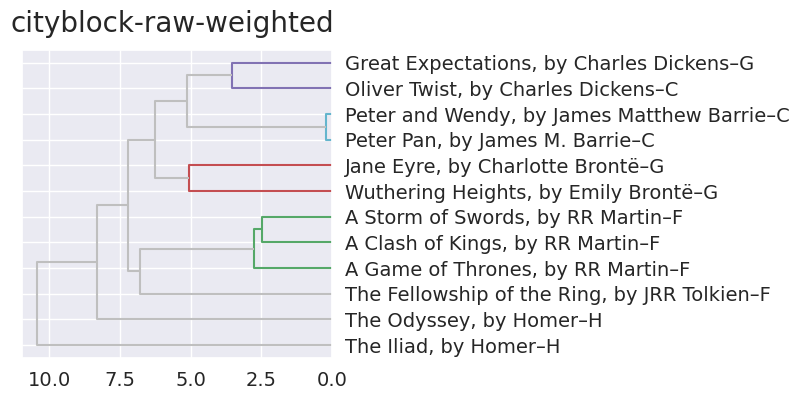

In [7]:
exec(open("code/methods.py").read())
print(combos[0][-1])
hca(PAIRS[combos[0][-1]],"cityblock-raw-weighted", linkage_method = "weighted")

cosine–raw


<Figure size 640x480 with 0 Axes>

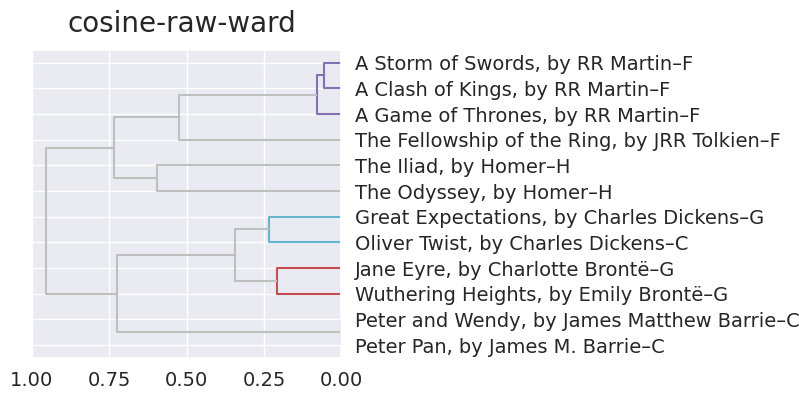

In [8]:
print(combos[1][-1])
hca(PAIRS[combos[1][-1]],"cosine-raw-ward", linkage_method = "ward")

euclidean–l2


<Figure size 640x480 with 0 Axes>

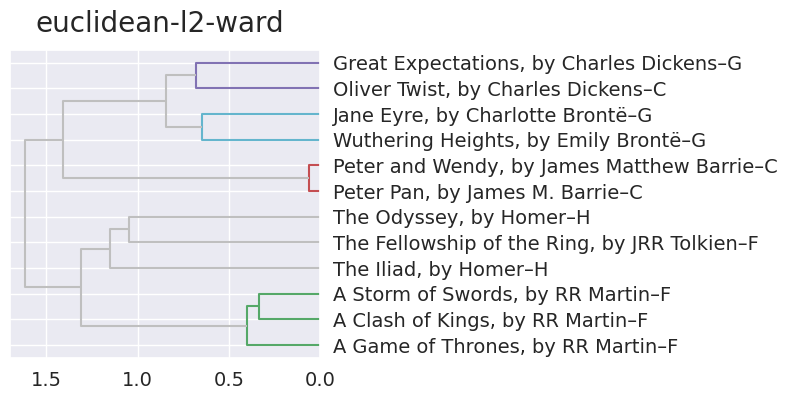

In [9]:
print(combos[2][-1])
hca(PAIRS[combos[2][-1]],"euclidean-l2-ward", linkage_method = "ward")

jaccard-l0


<Figure size 640x480 with 0 Axes>

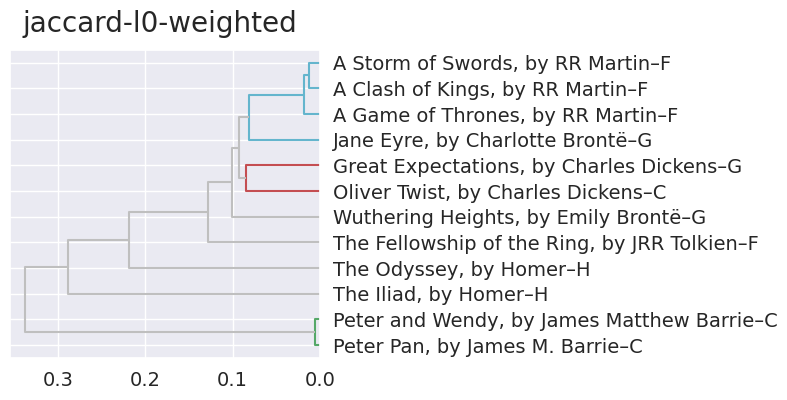

In [10]:
print(combos[3][-1])
hca(PAIRS[combos[3][-1]],"jaccard-l0-weighted", linkage_method = "weighted")

jensenshannon–l1


<Figure size 640x480 with 0 Axes>

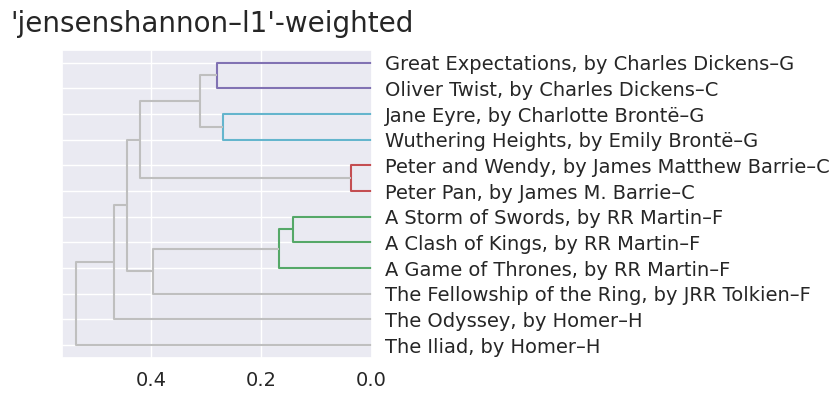

In [11]:
print(combos[4][-1])
hca(PAIRS[combos[4][-1]],"'jensenshannon–l1'-weighted", linkage_method = "weighted")

In [12]:
PAIRS.to_csv("data/PAIRS.csv")

In [19]:
LIB

,book_title,book_file,chap_regex,book_length,n_chaps,genre,mood,author,label
book_id,,,,,,,,,
1,"A Game of Thrones, by RR Martin",corpus/MARTIN_A_GAME_OF_THRONES-pg1.txt,[A-Z]+[A-Z]+[A-Z]+,294315,78,fantasy,adventure,RR Martin,"A Game of Thrones, by RR Martin–F"
2,"A Clash of Kings, by RR Martin",corpus/MARTIN_A_CLASH_OF_KINGS-pg2.txt,[A-Z]+[A-Z]+[A-Z]+,324029,142,fantasy,adventure,RR Martin,"A Clash of Kings, by RR Martin–F"
3,"A Storm of Swords, by RR Martin",corpus/MARTIN_A_STORM_OF_SWORDS-pg3.txt,[A-Z]+[A-Z]+[A-Z]+,417469,95,fantasy,adventure,RR Martin,"A Storm of Swords, by RR Martin–F"
4,"The Fellowship of the Ring, by JRR Tolkien",corpus/TOLKIEN_THE_FELLOWSHIP_OF_THE_RING-pg4.txt,_Chapter,180888,22,fantasy,adventure,JRR Tolkien,"The Fellowship of the Ring, by JRR Tolkien–F"
16,"Peter Pan, by James M. Barrie",corpus/BARRIE_PETER_PAN-pg16.txt,((Chapter)\s+\D+),47631,17,childrensfantasy,adventure,James M. Barrie,"Peter Pan, by James M. Barrie–C"
730,"Oliver Twist, by Charles Dickens",corpus/DICKENS_OLIVER_TWIST-pg730.txt,((CHAPTER)\s+\D+),160895,53,crime,satire,Charles Dickens,"Oliver Twist, by Charles Dickens–C"
768,"Wuthering Heights, by Emily Brontë",corpus/BRONTE_WUTHERING_HEIGHTS-pg768.txt,((CHAPTER)\s+\D+),118361,34,gothic,tragic,Emily Brontë,"Wuthering Heights, by Emily Brontë–G"
1260,"Jane Eyre, by Charlotte Brontë",corpus/BRONTE_JANE_EYRE-pg1260.txt,((CHAPTER)\s+\D+)|PREFACE,191636,39,gothic,romance,Charlotte Brontë,"Jane Eyre, by Charlotte Brontë–G"
1400,"Great Expectations, by Charles Dickens",corpus/DICKENS_GREAT_EXPECTATIONS-pg1400.txt,((Chapter)\s+\D+),188910,59,gothic,regretful,Charles Dickens,"Great Expectations, by Charles Dickens–G"


In [18]:
PAIRS.style.background_gradient()

In [22]:
PAIRS.xs(1, level=1, drop_level=False).style.background_gradient()

,,corr–raw,cityblock–raw,cosine–raw,euclidean–l2,jaccard-l0,jensenshannon–l1
doc_a,doc_b,,,,,,
2,1,0.129255,2.694847,0.064280,0.358553,0.019202,0.158872
3,1,0.164671,2.806215,0.082284,0.405671,0.017650,0.177303
4,1,0.750748,6.702633,0.558086,1.056490,0.266968,0.469951
16,1,0.879844,7.583657,0.479037,0.978813,0.083000,0.423842
730,1,0.910884,6.641639,0.558243,1.056639,0.264957,0.469321
768,1,0.928432,8.470164,0.495796,0.995787,0.111556,0.438945
1260,1,0.943370,6.897704,0.435253,0.933009,0.093373,0.402995
1400,1,0.923260,10.072329,0.617486,1.111293,0.259708,0.527069
1727,1,0.757993,10.537205,0.674407,1.161385,0.297269,0.545138


In [23]:
PAIRS.xs(2, level=1, drop_level=False).style.background_gradient()

,,corr–raw,cityblock–raw,cosine–raw,euclidean–l2,jaccard-l0,jensenshannon–l1
doc_a,doc_b,,,,,,
3,2,0.114413,6.651375,0.429195,0.926494,0.096076,0.395412
4,2,0.756606,6.399848,0.525179,1.024869,0.108500,0.441777
16,2,0.895652,6.490708,0.497365,0.997361,0.091546,0.434171
730,2,0.947610,2.455607,0.055561,0.333350,0.012633,0.142676
768,2,0.972868,7.967502,0.486543,0.986452,0.082000,0.428645
1260,2,0.983680,6.702485,0.559854,1.058163,0.263924,0.472025
1400,2,0.951391,6.628066,0.559292,1.057631,0.261917,0.471038
1727,2,0.726105,6.640421,0.534361,1.033790,0.267363,0.451701
6130,2,0.897099,5.342485,0.294995,0.768108,0.087384,0.307994


In [24]:
PAIRS.xs(3, level=1, drop_level=False).style.background_gradient()

,,corr–raw,cityblock–raw,cosine–raw,euclidean–l2,jaccard-l0,jensenshannon–l1
doc_a,doc_b,,,,,,
4,3,0.771711,8.101119,0.485017,0.984903,0.111612,0.433520
16,3,0.892253,8.363868,0.503809,1.003802,0.197680,0.461599
730,3,0.948544,6.950274,0.424607,0.921528,0.097941,0.394734
768,3,0.962114,7.005722,0.500801,1.000801,0.090545,0.437098
1260,3,0.984662,6.547354,0.539088,1.038353,0.102000,0.451072
1400,3,0.956820,6.684073,0.534151,1.033587,0.268548,0.451581
1727,3,0.759207,5.118680,0.481349,0.981172,0.250396,0.419827
6130,3,0.927083,3.546550,0.232822,0.682381,0.084331,0.280693
26654,3,0.891503,8.538342,0.508198,1.008164,0.203809,0.448270


In [25]:
PAIRS.loc[1260].style.background_gradient()

,corr–raw,cityblock–raw,cosine–raw,euclidean–l2,jaccard-l0,jensenshannon–l1
doc_b,,,,,,
1,0.943370,6.897704,0.435253,0.933009,0.093373,0.402995
2,0.983680,6.702485,0.559854,1.058163,0.263924,0.472025
3,0.984662,6.547354,0.539088,1.038353,0.102000,0.451072
4,0.739076,8.307844,0.493948,0.993929,0.106053,0.440951
16,0.725076,7.798362,0.490856,0.990813,0.076500,0.432593
730,0.505519,6.682931,0.507098,1.007073,0.085043,0.441893
768,0.399325,8.212558,0.500806,1.000805,0.194766,0.454224


In [26]:
PAIRS.xs(1260, level=1, drop_level=False).style.background_gradient()

,,corr–raw,cityblock–raw,cosine–raw,euclidean–l2,jaccard-l0,jensenshannon–l1
doc_a,doc_b,,,,,,
1400,1260,0.459056,8.466121,0.549912,1.048725,0.220786,0.466086
1727,1260,0.765269,10.146295,0.744465,1.220217,0.387500,0.586721
6130,1260,0.974342,5.823409,0.298142,0.772195,0.105318,0.321741
26654,1260,0.724278,5.171052,0.470130,0.969670,0.250784,0.420600
